<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


[9]


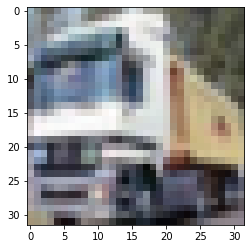

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])
print(y_train[1])

In [5]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the dense layer with probability 0.5
hidden_size = 512 # the dense layer will have 512 neurons

In [6]:
import numpy as np
from keras.utils import np_utils

num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [7]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten

inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/200
1407/1407 [==============================] - 12s 4ms/step - loss: 2.0481 - accuracy: 0.2112 - val_loss: 1.6782 - val_accuracy: 0.3684
Epoch 2/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7100 - accuracy: 0.3534 - val_loss: 1.5439 - val_accuracy: 0.4228
Epoch 3/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6227 - accuracy: 0.3985 - val_loss: 1.4827 - val_accuracy: 0.4618
Epoch 4/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5765 - accuracy: 0.4154 - val_loss: 1.4664 - val_accuracy: 0.4626
Epoch 5/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5360 - accuracy: 0.4378 - val_loss: 1.4298 - val_accuracy: 0.4770
Epoch 6/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5023 - accuracy: 0.4506 - val_loss: 1.4139 - val_accuracy: 0.4922
Epoch 7/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4735 - accuracy: 0.4642 - val_loss: 1.3672 - val_a

[1438.5760498046875, 0.18310000002384186]

In [8]:
model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1438.5760 - accuracy: 0.1831


[1438.5760498046875, 0.18310000002384186]